## Visualizing results -  Original Geoparser - Third Edition

We have run the [Edinburgh geoparser](https://programminghistorian.org/en/lessons/geoparsing-text-with-edinburgh#patch-fix) to extract and resolvoe locations contained within the **Third Edition of the Encyclopaedia Britannica**. 
                             
The query for running that we have used is the following: 

`spark-submit --py-files defoe.zip defoe/run_query.py nls_thrid_edition nls defoe.nls.queries.geoparser_pages -r geoparser_original_EB_third_edition -n 16`



### Loading the necessary libraries

In [1]:
import yaml
from IPython.core.display import display, HTML
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

### Functions

In [2]:
def read_query_results(filename):
    with open('./results_NLS/'+filename, 'r') as f:
        query_results = yaml.load(f)
    return query_results


In [3]:
def geresolution_dataframe(result):
    dfs=[]
    data=[]
    c_locs=[]
    for i in result.keys():
        t_ind = 0
        e_ind = 0
        for k in result[i]:
            locs= k["georesolution_page"]
            page = k["text_unit id"]
       
            if locs != {}:
                data=[]
                l_ind = 0
                for i in locs:
                    if type(locs[i]) == type([]) :
                        c_locs=locs[i].copy()
                        c_locs.append(i.split("-")[0])
                        c_locs.append(page)
                        data.append(c_locs)
                        l_ind = l_ind + 1   
                e_ind = t_ind + l_ind 
                if data:
                    df_page = pd.DataFrame(data, columns = ['Latitude', 'Longitude', 'Place', 'Page'], 
                                      index=list(range(t_ind, e_ind)))
                    dfs.append(df_page)
                    t_ind=e_ind
    df_total = pd.concat(dfs)
    return df_total

In [4]:
def get_place(df, lat, long):
    df_new=df.loc[(df['Latitude'] == lat) & (df_total['Longitude'] == long)]['Place']
    return df_new.count(), df_new.iloc[0]

In [5]:
def label_freq_places(df_total, df_max_geolocations, filter_list):
    place_label=[]
    place_freq = []
    i_limit = 15
    i =0
    k =0 
    while k < i_limit:
        place_count, place_name = get_place(df_total, df_max_geolocations.iloc[i]['Latitude'], df_max_geolocations.iloc[i]['Longitude'])
        if place_name not in filter_list:
            print(i, place_count,place_name)
            if place_name not in place_label:
                k = k + 1
            place_label.append(place_name)
            place_freq.append(place_count)
         
        i = i + 1
    return place_label, place_freq

In [6]:
def plot_bar_places(df_group_places):
    # this is for plotting purpose
    index = np.arange(len(df_group_places['place_label']))
    plt.bar(index, df_group_places['count'], color='orange')
    plt.xlabel('Places')
    plt.ylabel('Frequency of Places')
    plt.xticks(index, df_group_places['place_label'], rotation=40, fontsize=8)
    plt.title('15 Places most mentioned in the using the Original Geoparser')

### Information about the defoe geoparser query

This query does the following tasks:

- Ingests all the pages indicated in the query
- Cleans the text applied two fixes: Long-s and hyphen words
- Identifies *entities* using the original geotagging of the Edinburgh geoparser. 
- From the previous entities, just selects the one about *location* and creates an xml (in memory) per page with these "location" entities. 
- Applies the georesolve of the Edinburgh geoparser to each xml and gets lat and long. **Important: Everything is in memory, we do not create XML files in those steps**
- Group the results by Book's title, and also gets some informative metadata

As a result we get a file per book with an entry per page with the following information:

    * edition: Edition of the gazetteer
    * georesolution_page: Page's geolocations after applying the georesolver
    * page_filename: Page's filename (page's relative path)
    * text_unit id: The number of this page (e.g. Page 1)
    * lang_model : The language model applied (original_geoparser)
    * type_distribution: type of document (newspaper|book). In this case is "book". 
    * year: Publication year 


In [7]:
results=read_query_results('geoparser_original_EB_third_edition')

In [10]:
results_suplement = read_query_results('geoparser_original_EB_third_suplement')

In [11]:
df1= geresolution_dataframe(results)
df2 = geresolution_dataframe(results_suplement)
frames = [df1, df2]

df_total = pd.concat(frames)

In [12]:
df_total[["Place"]].count()

Place    245864
dtype: int64

In [13]:
df_total["Place"]= df_total["Place"].str.capitalize()

In [14]:
df_total.groupby("Place").count()

,Latitude,Longitude,Page
Place,,,
'ql.,1,1,1
Aach,3,3,3
Aaium,1,1,1
Aalen,2,2,2
Aalo,1,1,1
Aar,14,14,14
Aaron hill,9,9,9
Aas,3,3,3
Aat,1,1,1


In [18]:
df_filter = df_total[['Latitude','Longitude']].groupby(['Latitude', 'Longitude'])['Longitude'] \
                             .count() \
                             .reset_index(name='count') \
                             .sort_values(['count'], ascending=False)   

df_max_geolocations = df_filter.drop(0)

df_max_geolocations.head(15)


,Latitude,Longitude,count
18417,43.2256251,-75.48878740000001,3049
11690,38.7937266,-77.8577722,2135
8212,34.6120507,-82.765139,1991
17717,42.7578673,-71.2422828,1519
11835,38.8873341,-77.05553279999999,1377
27933,52.16045,-0.70312,1362
12483,39.2867738,-76.6010777,1283
8049,34.350601,-85.15801399999999,1224
24492,49.012779,2.55,1223
20732,45.2535999,-86.9795592,1127


In [19]:
#Getting the 15 places (and their frequencies) most mentioned
filter_list=['Jupiter', 'Venus, a d p', 'Saturn']
place_label, place_freq = label_freq_places(df_total, df_max_geolocations, filter_list)
    

0 3049 Rome
1 2135 England
2 1991 France
3 1519 England
4 1377 Scotland
5 1362 England
6 1283 Italy
7 1224 Rome
8 1223 Paris
9 1127 Europe
10 1117 Oxford
11 1017 Edinburgh
12 1011 Asia
13 1007 France
14 993 England
15 983 Europe
16 957 Britain
17 910 France
18 853 Venice
19 852 America
20 837 Scotland
21 810 Germany
22 807 Paris
23 788 London


In [20]:
#Visualizing the 15 places in a Bar plot
df_places = {'place_label':place_label,'place_freq':place_freq}
df_places_freq = pd.DataFrame(df_places)
df_group_places = df_places_freq.groupby(['place_label'])['place_freq'].sum()\
                             .reset_index(name='count') \
                             .sort_values(['count'], ascending=False)   


df_group_places

,place_label,count
4,England,6009
12,Rome,4273
6,France,3908
13,Scotland,2214
5,Europe,2110
11,Paris,2030
8,Italy,1283
10,Oxford,1117
3,Edinburgh,1017
1,Asia,1011


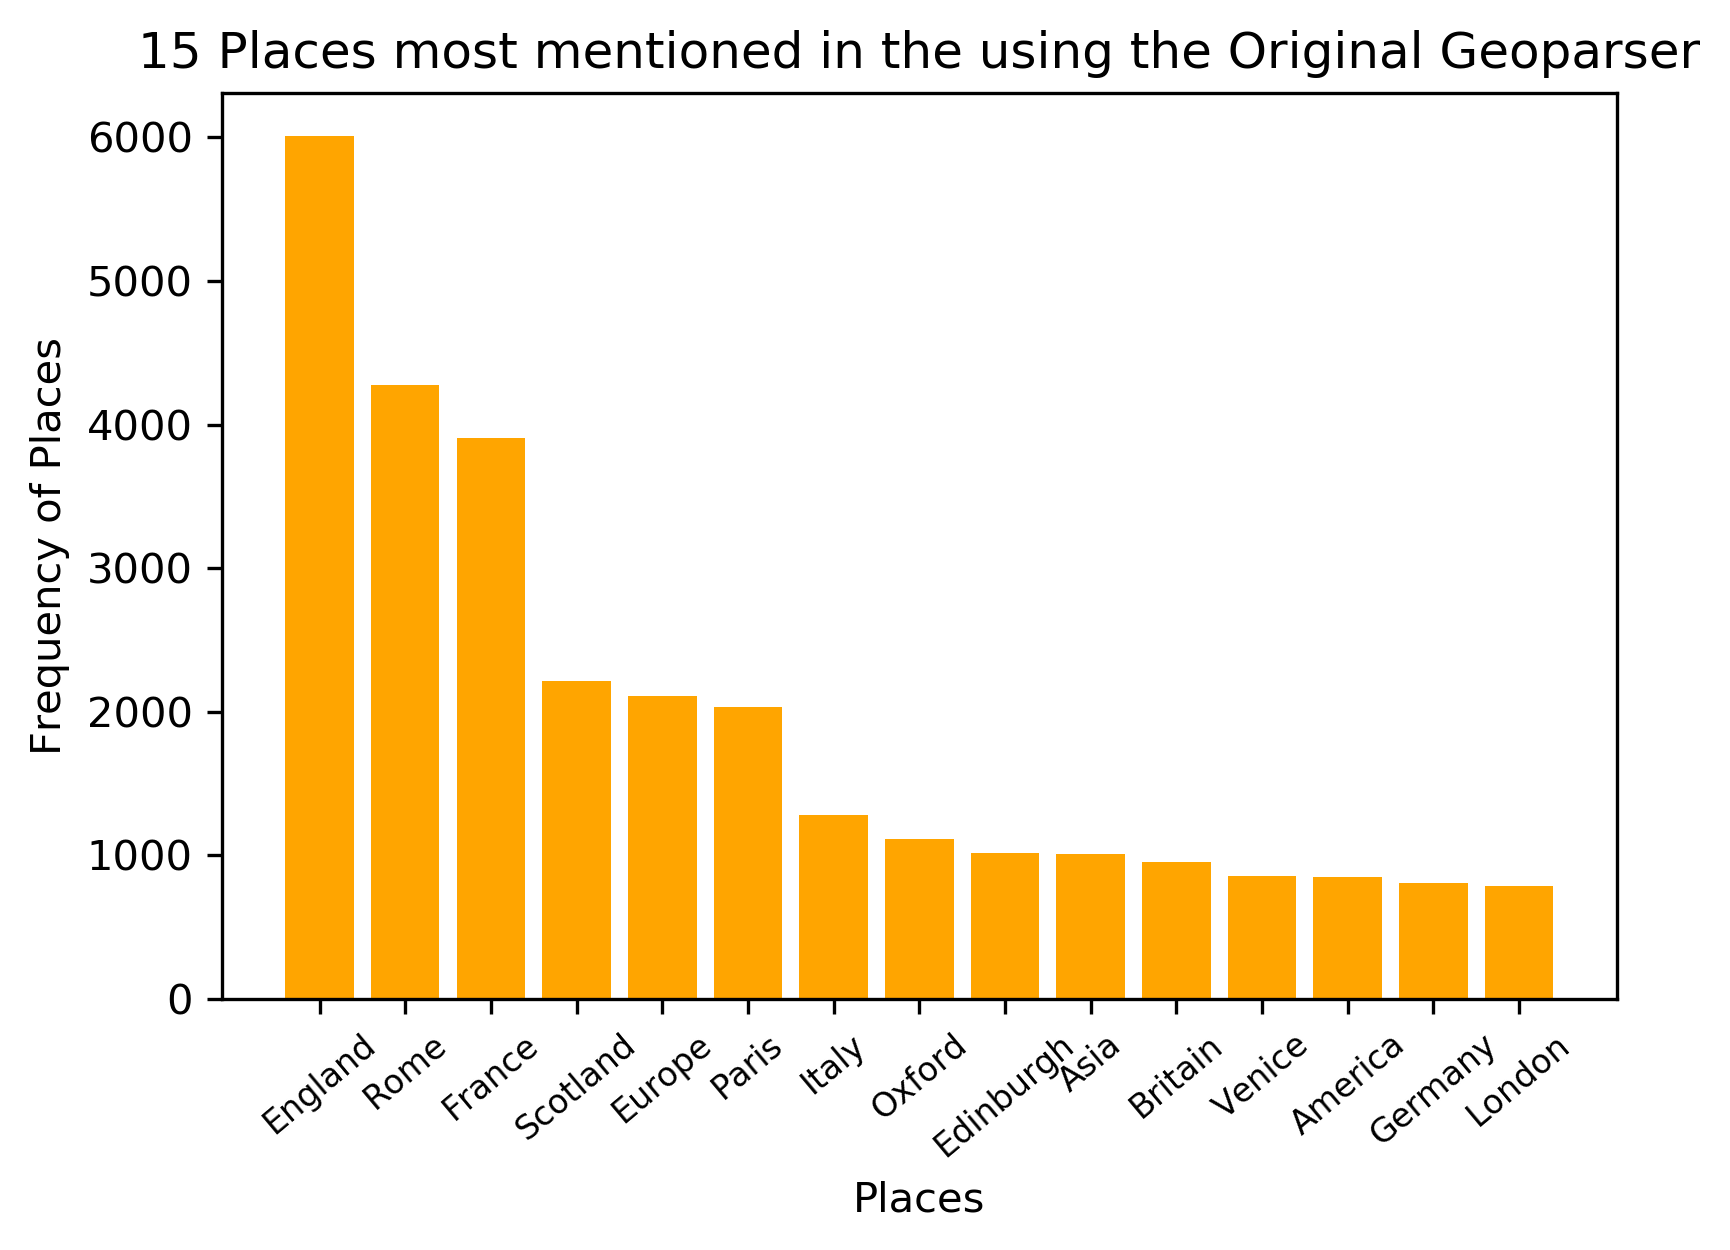

In [21]:
mpl.rcParams['figure.dpi']=300
plot_bar_places(df_group_places)